# Monty Hall Problem

## Introduction

There are 3 doors. Two contain a goat each while the third door contains a car. 

<pre>
MMMMMMMMMMMMMMD,,MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMONMMMMMMMMMMMMMMMMMMMMMM,,MMMMMMMMMMMMMMMM
MMMMMMMMMMMM????IMMMMMMMMMMMMMMMMMMMMMMMMMMMMOOOODMO8O8OO8MMMMMMMMMMMMM???MMMMMMMMMMMMMMMMMM
MMMMMMMMM,,M????NMMMMM$MMMMMMMMMMMMMMMMMMM?$ZMOOOOMMM8888N MMMMMMMMM,,M?~??MMMMMM8MMMMMMMMMM
MMMMMMMMMMM??????MMMMM?MMMMMMMMMMMMMMM7$Z7$$ZO88DMMN8888M,NMMMMMMMMMMM7????7MMMMM?MMMMMMMMMM
MMMMMMMMMM?MM.?8??????MMMMMMMMMMMMMMMNOOOZZ$ZOO8OO8888OD,$MMMMMMMMMMM?MMZ?8??????,MMMMMMMMMM
MMMMMMMMMMMMM?,????????MMMMMMMMMMMMMNOOZZZOOOOON888DDNMMMMMMMMMMMMMMMMMMD,~???????MMMMMMMMMM
MMMMMMMMMMMMMM,???,???MMMMMMMMMMMMMMMNZZO8DNNO??MDDMMMMMMMMMMMMMMMMMMMMMM++??,???MMMMMMMMMMM
MMMMMMMMMMMMMMMM?MM???MMMMMMMMMMMMMMMMNNDDN888M:MMMMMMMMMMMMMMMMMMMMMMMMM7O?M$?7?MMMMMMMMMMM
MMMMMMMMMMMMMM?M?MM??MMMMMMMMMMMMMMMMMMMMDD888M:NMMMMMMMMMMMMMMMMMMMMMMMM?M?MM??MMMMMMMMMMMM
MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM
MMMMMMI:~~~~~~~~~~~~~~~~~~~~=MMMMMMI~~~~~~~~~~~~~~~~~~~~~MMMMMMM:~~~~~~~~~~~~~~~~~~~~~MMMMMM
MMMMMM7~~~I~~~~~~~7+~~~~~M~~=MMMMMM7~~ZIII~~~~~II7+~~~~~~MMMMMMM:~~M?~~~~~~~I=~~~~~~~~MMMMMM
MMMMMM$~~~~~~~~~~~7~~~~~~M~~=MMMMMM$~~Z~~~~~~~~I~~~~~~~~~MMMMMMM:~~M~~~~~~~~I~~~~~~~~~MMMMMM
MMMMMM$~~~~~~~~~~~I~~~~~~M~~=MMMMMM$~~Z~~~~~~~~7~~~~~~~~~MMMMMMM:~~M~~~~~~~~7~~~~~~~~~MMMMMM
MMMMMMZ~~~~~~~~~~~7~~~=~~M~~IMMMMMMZ~~Z~~~~~~:~7~~~~+~~~~MMMMMMM:~~M~~~~~~:~+~~~M~~~~~MMMMMM
MMMMMMO~~~~~~~~~~~7~~~=~~M~~7MMMMMMO~~Z~~~~~~:~I~~O~~~~~~MMMMMMM:~~M~~~~~~:~~~~~M~~~~~MMMMMM
MMMMMM8~~~~~~~~~:~7~~~~~~M~~7MMMMMM8~~Z~~~~~~:~~~~~~~~~~~MMMMMMM:~~M~~~~~~:~~~~~~~~~~~MMMMMM
MMMMMMD~~~~~~~~~:~?~~~~~~M~~7MMMMMMD~~Z~~~~~~:~~~~~~~~~~~MMMMMMM:~~M~~~~~~:~~~~~~~:~~~MMMMMM
MMMMMMN~~~~::::::~~::::::M++7MMMMMMN~~Z~~:::::~~~:::::O+=MMMMMMM,~~M:::::::~~::::::++=MMMMMM
MMMMMMM~~~~~~~~~~~~~~~~~~~=+7MMMMMMM~~~~~~~~~~~~~~~~~~O?+MMMMMMM,~~~~~~~~~~~~~~~~~~+O+MMMMMM
MMMMMMM~~~~~~~~~~~7~~~~~~MII7MMMMMMM~~~~~~~~~~~I~~~~~~O++MMMMMMM,~~$~~~~~~~~I~~~~~~IIIMMMMMM
MMMMMMM~~~~~~~~~~~7~~~~~~M~~7MMMMMMM~~=~~~~~~~~I~~~~~~~~~MMMMMMM,~~Z~~~~~~~~I~~~~~~~~~MMMMMM
MMMMMMM~~~~~~~~~~~7~~~~~~M~~7MMMMMMM~~=~~~~~~~~I~~~~~~~~~MMMMMMM,~~Z~~~~~~:~I~~~~~~~~~MMMMMM
MMMMMMM~~~~~~~~~~~7~~~~~~M~~7MMMMMMM~~=~~~~~~:~7~~~~~~~~~MMMMMMM:~~O~~~~~~:~~~~~~~~~~~MMMMMM
MMMMMMM~~~~~~~~~:~I~~~~~~M~~7MMMMMMM~~=~~~~~~:~=~~~~~~~~~MMMMMMM:~~D~~~~~~:~~~~~~~~~~~MMMMMM
MMMMMMM~~~~~~~~~:~7~~~~~~M~~7MMMMMMM~~=~~~~~~:~~~~~~~~~~~MMMMMMM~~~N~~~~~~:~~~~~~~:~~~MMMMMM
MMMMMMM~~~~~~~~~:~=~~~~~~M~~7MMMMMMM~~=~~~~~~:~~~~~~~:~~~MMMMMMM~~~M~~~~~~:~~~~~~~:~~~MMMMMM
MMMMMMM~~~~~~~~~~~~~~~~~~~~~7MMMMMMM~~~~~~~~~~~~~~~~~~~~~MMMMMMM~~~~~~~~~~~~~~~~~~~~~=MMMMMM
</pre>

The idea behind this notebook is to run a simulation that proves that switching the door after the 
a goat door was opened results in a more favorable outcome for the candidate.

## Prove Of Concept

The key point is that it is more probable to pick a goat at the initial guess than the price. So when
the moderator narrows it down to just two doors it is more likely that the second door contains the price.
Think about 100 doors in the initial state and after picking a door (99/100 chance to pick a goat door) it again gets narrowed down to just two doors. Since it is highly likely that you picked a goat door, you should switch.


In [1]:
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import concurrent.futures # used for threading the result

%matplotlib inline
from IPython.display import clear_output # enable one line writing

In [2]:

def run_Game(rounds=10000, amountDoors=3):

    rand = random.Random()
    rand.seed(int(time.time()))
    results = pd.DataFrame( columns=['Doors', 'Choice']);


    #rounds = 10000 # how many games should be played in this simulation
    #amountDoors = 100

    for round in range(1,rounds+1): # 2000 trials

        # reset game / New game
        doorField = []
        for door in range(0,amountDoors):
            doorField.append(0);
        doors = np.array(doorField) # list of gates with various prices (0=goat / 1=price)
        price = rand.randrange(start=1, stop=amountDoors+1) # price gate
        doors[price-1] = 1 # put price behind the gate
        method_stubborn = 0;
        method_switcher = 0;

        # choose a door
        choice = rand.randrange(start=1, stop=amountDoors+1) # choose a gate

        # open one goat door
        for door in range(1,len(doors)+1):
            if(doors[door-1] == 0 and door != choice):
                doors[door-1] = 2 # mark as opened ('2')
                #break;

        # stubborn player keeps his chosen door
        # while the switcher whould take the other one
        if(doors[choice-1] == 1 ):
            method_stubborn = 1; # stubborn stayed with winning door
            method_switcher = 0; # switcher switched from winning door 
        else:
            method_stubborn = 0; # stubborn stayed with losing door
            method_switcher = 1; # switcher switched to winning door 


        currentResult = pd.DataFrame([[doors,choice, method_stubborn, method_switcher]], columns=['Doors', 'Choice', 'Stubborn', 'Switcher'])
        results = results.append(currentResult, ignore_index=True)
        

    
    stubborn = results.Stubborn.sum() / results.shape[0]*100
    switcher = results.Switcher.sum() / results.shape[0]*100
    return pd.DataFrame([[amountDoors, rounds, stubborn, switcher]], columns=['Doors', 'Runs', 'Stubborn', 'Switcher'])

In [ ]:

# Create Future / Executor to thread the game simulations
gameRounds = 10000
maxDoors = 50
executor = concurrent.futures.ProcessPoolExecutor(4)
futures = [executor.submit(run_Game, gameRounds, numDoors) for numDoors in range(3,maxDoors)]
concurrent.futures.wait(futures)

# Generate final result dataframe
gameResult = pd.DataFrame();
for result in futures:
    gameResult = gameResult.append(result.result(), ignore_index=True);
print("Amount of gathered game results: {0}".format(gameResult.size))

In [ ]:
gameResult.to_pickle(path="./MontyHall_resultDF.pkl")

In [3]:
gameResult = pd.read_pickle(path="./MontyHall_resultDF.pkl")

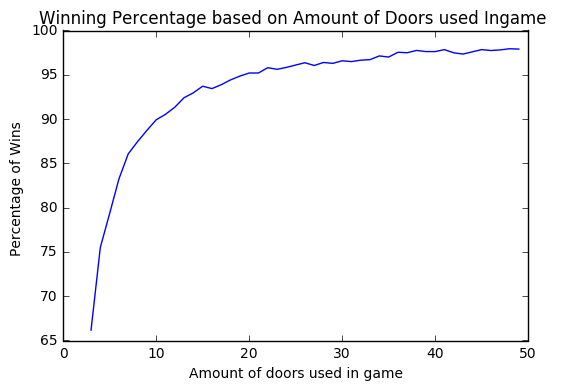

In [7]:

#fig.plot(gameResult.Doors, gameResult.Switcher)

plt.subplot(111)
plt.plot(gameResult.Doors, gameResult.Switcher)
plt.title('Winning Percentage based on Amount of Doors used Ingame ')
plt.ylabel('Percentage of Wins ')
plt.xlabel('Amount of doors used in game')

